# Malignant Comments Project

In [1]:
# import useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Data Reading and Understanding

In [2]:
# import train dataset
df_train = pd.read_csv("Malignant_train.csv")
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [3]:
# import test dataset
df_test = pd.read_csv("Malignant_test.csv")
df_test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [4]:
# check shape of the train and test dataset
print(df_train.shape)
print(df_test.shape)

(159571, 8)
(153164, 2)


In our train dataset we have 159571 rows and 8 features, while in test dataset 153164 rows and 2 features are present.

In [5]:
# check information of train data
print(df_train.info())

# check information of test data
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 2.3+ MB
None


We don't have any null value in our train and test dataset. 

<AxesSubplot:>

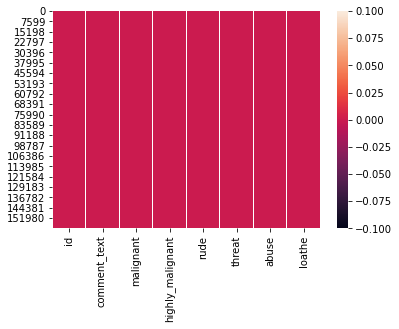

In [6]:
# check null values of train data using heatmap
sns.heatmap(df_train.isnull())

From the above heatmap, we can clearly see that there is no null value found in our dataset.

In [7]:
# check discriptive statistics of the train dataset
df_train.describe(include='all')

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571,159571,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
unique,159571,159571,NaN,NaN,NaN,NaN,NaN,NaN
top,66c90000955791b0,Screw you Josh \n\nThe world needs assholes li...,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,NaN,NaN,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


1. From the above table, we can see that there no duplicate data present in comment_text column.
2. All numerical columns have only two values i.e. 0 and 1.

<AxesSubplot:>

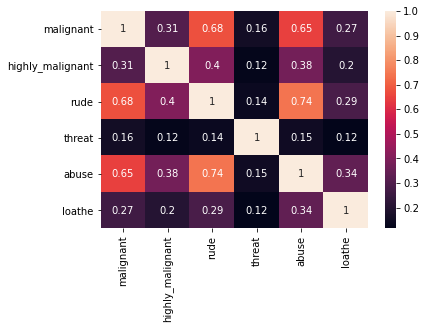

In [8]:
# check correlation of numerical features using heatmap
sns.heatmap(df_train.corr(), annot=True)

## Data Analysis

malignant


0    144277
1     15294
Name: malignant, dtype: int64


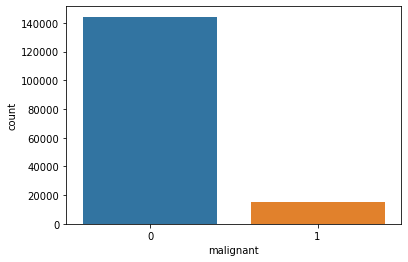

highly_malignant


0    157976
1      1595
Name: highly_malignant, dtype: int64


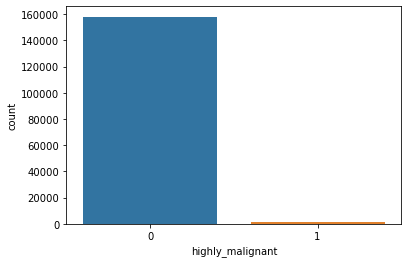

loathe


0    158166
1      1405
Name: loathe, dtype: int64


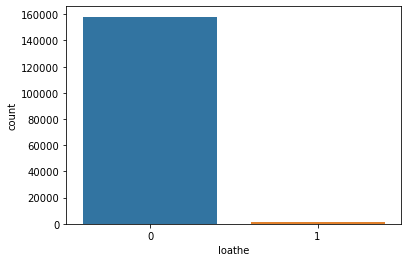

rude


0    151122
1      8449
Name: rude, dtype: int64


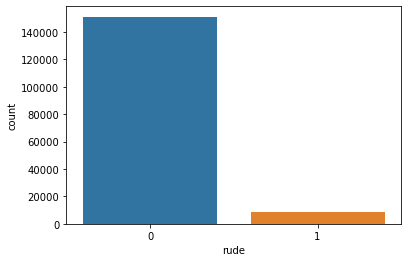

abuse


0    151694
1      7877
Name: abuse, dtype: int64


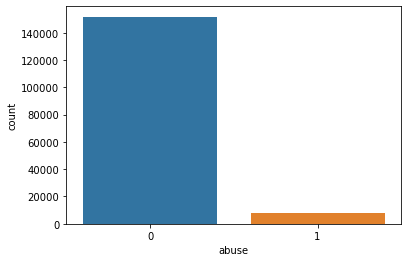

threat


0    159093
1       478
Name: threat, dtype: int64


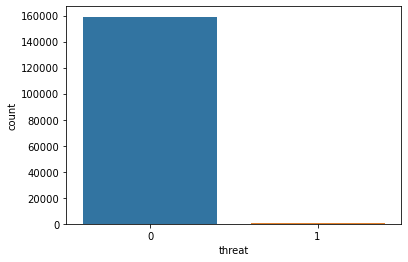

In [9]:
# check count plot of all target features. 
column = ['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in column:
    print(i)
    print('\n')
    print(df_train[i].value_counts())
    sns.countplot(df_train[i])
    plt.show()

Above all count plot is our target feature and we can see that there is imbalanced classification and this issue affect our final result. So, we will use oversampling method in further process.

In [10]:
# create a label feature, which is combination of all target columns.
all_labels = ['malignant','highly_malignant','rude','threat','abuse','loathe']
df_train['Label'] = df_train[all_labels].sum(axis=1)

In [11]:
df_train.head(8)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0


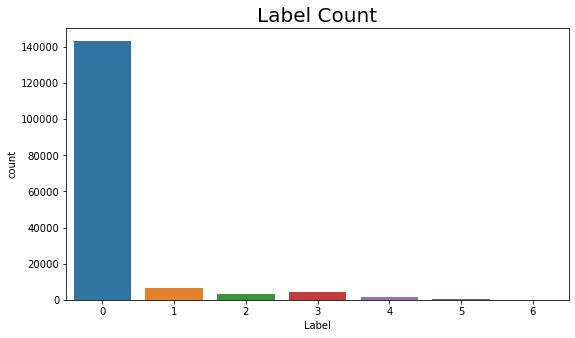

In [12]:
# plot label column count
plt.figure(figsize=(9,5))
sns.countplot(df_train['Label'])
plt.title("Label Count",fontsize=20)
plt.show()

From the above plot we can say that, most of the comments are good and very less numbers of comments is bad.

In [13]:
# Here, we convert label column in form of 0 and 1 (scaling).
df_train['Label'] = df_train['Label']>0
df_train['Label'] = df_train['Label'].astype(int)

In [14]:
df_train.head(8)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0


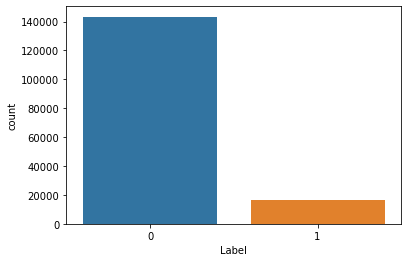

0    143346
1     16225
Name: Label, dtype: int64

In [15]:
# Here, we plot our label column
sns.countplot(df_train['Label'])
plt.show()

df_train['Label'].value_counts()

From the above count plot we can see that, even after merge all target columns, it is still imbalanced. So, to solve this issue we use oversampling method in further process. 

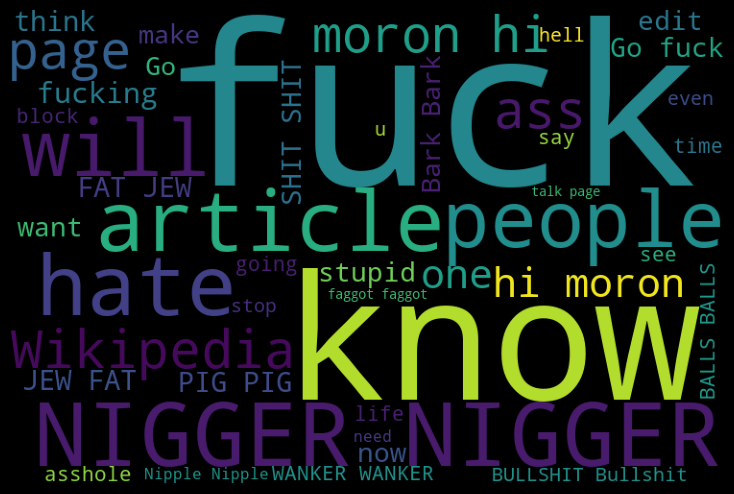

In [16]:
# Now, we plot wordcloud of malignant comments and see which type word is most used in malignant comments.
from wordcloud import WordCloud
hams = df_train['comment_text'][df_train['malignant']==1]
spam_cloud = WordCloud(width=750,height=500,background_color='black',max_words=45).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

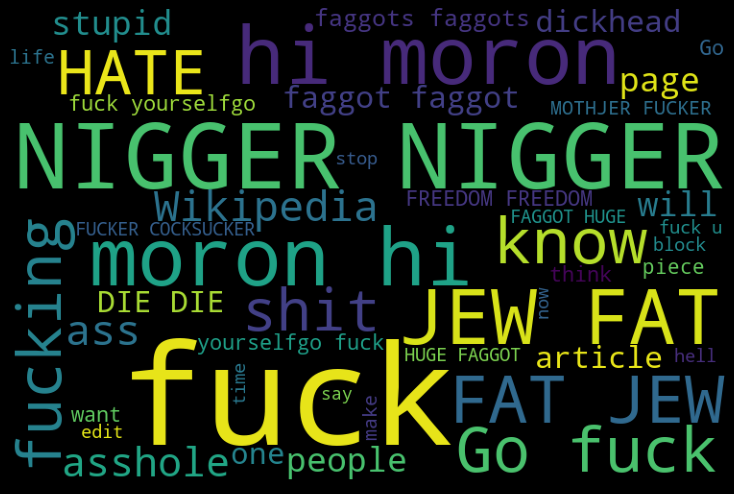

In [17]:
# Now, we plot wordcloud of abuse comments and see which type word is most used in abuse comments.
hams = df_train['comment_text'][df_train['abuse']==1]
spam_cloud = WordCloud(width=750,height=500,background_color='black',max_words=45).generate(' '.join(hams))
plt.figure(figsize=(10,8),facecolor='k')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Data Preparation

In [18]:
# import useful libraries
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
from nltk.corpus import stopwords
stop = stopwords.words('english')
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [19]:
# calculating comments length
df_train["comment_length"] = df_train["comment_text"].str.len()

In [20]:
# Convert all comments text into lower case
df_train['Cleaned_comment_text'] = df_train['comment_text'].str.lower()
df_test['cleaned_comment_text'] = df_test['comment_text'].str.lower()

In [21]:
# remove punctuation from cleaned comment text column
df_train['Cleaned_comment_text'] = df_train['Cleaned_comment_text'].str.replace('[^\w\s]','')
df_test['cleaned_comment_text'] = df_test['cleaned_comment_text'].str.replace('[^\w\s]','')

In [22]:
# removing stopwords from cleaned comment text column
df_train['Cleaned_comment_text'] = df_train['Cleaned_comment_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_test['cleaned_comment_text'] = df_test['cleaned_comment_text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Label,comment_length,Cleaned_comment_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112,daww matches background colour im seemingly st...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233,hey man im really trying edit war guy constant...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622,cant make real suggestions improvement wondere...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67,sir hero chance remember page thats


In [23]:
# Now, let's remove digits from the cleaned comment text column
df_train['Cleaned_comment_text'] = df_train['Cleaned_comment_text'].str.replace('\d+', '')
df_test['cleaned_comment_text'] = df_test['cleaned_comment_text'].str.replace('\d+', '')

In [24]:
# Here, we use Lemmatizing. Lemmatization is the process of converting a word to its base form.
df_train['Cleaned_comment_text'] = df_train['Cleaned_comment_text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(x) for x in x.split()))
df_test['cleaned_comment_text'] = df_test['cleaned_comment_text'].apply(lambda x: ' '.join(lemmatizer.lemmatize(x) for x in x.split()))
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Label,comment_length,Cleaned_comment_text
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112,daww match background colour im seemingly stuc...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233,hey man im really trying edit war guy constant...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622,cant make real suggestion improvement wondered...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67,sir hero chance remember page thats


In [25]:
# calculating cleaned comments length
df_train["Cleaned_comment_length"] = df_train["Cleaned_comment_text"].str.len()
df_train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,Label,comment_length,Cleaned_comment_text,Cleaned_comment_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264,explanation edits made username hardcore metal...,175
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112,daww match background colour im seemingly stuc...,71
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233,hey man im really trying edit war guy constant...,144
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622,cant make real suggestion improvement wondered...,370
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67,sir hero chance remember page thats,35


In [26]:
# total reduced length
print("Original Length: ",df_train['comment_length'].sum())
print("Cleaned Length: ",df_train['Cleaned_comment_length'].sum())

Original Length:  62893130
Cleaned Length:  39446917


In [27]:
# convert text into vectors using TF-IDF
tf_vec = TfidfVectorizer(max_features=8000, stop_words='english')
feature = tf_vec.fit_transform(df_train['Cleaned_comment_text'])

# split the target column.
# here, our target column is label and it is a classification problem.
x = feature
y = df_train['Label']

In [29]:
# convert test data's text into vectors using TF-IDF
tf_vec = TfidfVectorizer(max_features=8000, stop_words='english')
feature_test = tf_vec.fit_transform(df_test['cleaned_comment_text'])

In [30]:
# Hear, we use SMOTE(resampling) method to cop up with imbalanced classification of target variable.
# SMOTE(Synthetic Minority Oversampling Technique) algorithm generates synthetic samples of minority class.
x_smote,y_smote = smote.fit_resample(x,y)
print(x.shape)
print(y.shape)

# check shape after oversampling  
print(x_smote.shape)
print(y_smote.shape)

(159571, 8000)
(159571,)
(286692, 8000)
(286692,)


In [31]:
# check the counts of original target column
y.value_counts()

0    143346
1     16225
Name: Label, dtype: int64

In [32]:
# check the count of target column after oversampling 
y_smote.value_counts()

1    143346
0    143346
Name: Label, dtype: int64

In [33]:
# split train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_smote,y_smote,test_size=0.20,random_state=0)

## Find Best Model

In [32]:
# our problem is classification type of problem.
# import useful libraries for machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

model = [LogisticRegression(),DecisionTreeClassifier(),MultinomialNB()]

for m in model:
    m.fit(x_train,y_train)
    train = m.score(x_train,y_train)
    predm = m.predict(x_test)
    print("Accuracy of",m,"is:")
    print("Accuracy of training model is:",train)
    print("Accuracy Score:",accuracy_score(y_test,predm))
    print("Confusion matrix:","\n",confusion_matrix(y_test,predm))
    print("Classification report:","\n",classification_report(y_test,predm))
    print("************************************************************")
    print("\n")

Accuracy of LogisticRegression() is:
Accuracy of training model is: 0.9355360514141956
Accuracy Score: 0.9280594359859782
Confusion matrix: 
 [[26162  2360]
 [ 1765 27052]]
Classification report: 
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     28522
           1       0.92      0.94      0.93     28817

    accuracy                           0.93     57339
   macro avg       0.93      0.93      0.93     57339
weighted avg       0.93      0.93      0.93     57339

************************************************************


Accuracy of DecisionTreeClassifier() is:
Accuracy of training model is: 0.9967822526847262
Accuracy Score: 0.9450984495718446
Confusion matrix: 
 [[26405  2117]
 [ 1031 27786]]
Classification report: 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94     28522
           1       0.93      0.96      0.95     28817

    accuracy                           0.95   

## Bagging and Boosting methods

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
train = rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy Score:",accuracy_score(y_test,pred_rf))
print("Confusion matrix:","\n",confusion_matrix(y_test,pred_rf))
print("Classification report:","\n",classification_report(y_test,pred_rf))

Accuracy of training model is: 0.9968432939617097
Accuracy Score: 0.9756361289872513
Confusion matrix: 
 [[27489  1033]
 [  364 28453]]
Classification report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98     28522
           1       0.96      0.99      0.98     28817

    accuracy                           0.98     57339
   macro avg       0.98      0.98      0.98     57339
weighted avg       0.98      0.98      0.98     57339



In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
parameters = {'learning_rate':[0.01,0.1]}
clf = GridSearchCV(gbc,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'learning_rate': 0.1}


In [36]:
gbc = GradientBoostingClassifier(learning_rate=0.1)
gbc.fit(x_train,y_train)
train = gbc.score(x_train,y_train)
predgbc = gbc.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy Score:",accuracy_score(y_test,predgbc)*100)
print("Confusion matrix:","\n",confusion_matrix(y_test,predgbc))
print("Classification report:","\n",classification_report(y_test,predgbc))

Accuracy of training model is: 0.8349967081311341
Accuracy Score: 83.0882994122674
Confusion matrix: 
 [[27386  1136]
 [ 8561 20256]]
Classification report: 
               precision    recall  f1-score   support

           0       0.76      0.96      0.85     28522
           1       0.95      0.70      0.81     28817

    accuracy                           0.83     57339
   macro avg       0.85      0.83      0.83     57339
weighted avg       0.85      0.83      0.83     57339



In [38]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train,y_train)
train = xg.score(x_train,y_train)
predxg = xg.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy Score:",accuracy_score(y_test,predxg))
print("Confusion matrix:","\n",confusion_matrix(y_test,predxg))
print("Classification report:","\n",classification_report(y_test,predxg))

[13:40:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy of training model is: 0.9159897625058316
Accuracy Score: 0.90578838138091
Confusion matrix: 
 [[27550   972]
 [ 4430 24387]]
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91     28522
           1       0.96      0.85      0.90     28817

    accuracy                           0.91     57339
   macro avg       0.91      0.91      0.91     57339
weighted avg       0.91      0.91      0.91     57339



In [40]:
from catboost import CatBoostClassifier
cb = CatBoostClassifier()
cb.fit(x_train,y_train)
train = cb.score(x_train,y_train)
predcb = cb.predict(x_test)
print("Accuracy of training model is:",train)
print("Accuracy Score:",accuracy_score(y_test,predcb))
print("Confusion matrix:","\n",confusion_matrix(y_test,predcb))
print("Classification report:","\n",classification_report(y_test,predcb))  

Learning rate set to 0.104923
0:	learn: 0.6398710	total: 2.23s	remaining: 37m 9s
1:	learn: 0.6047445	total: 4.4s	remaining: 36m 36s
2:	learn: 0.5816407	total: 6.72s	remaining: 37m 14s
3:	learn: 0.5666794	total: 9.04s	remaining: 37m 32s
4:	learn: 0.5521440	total: 11.4s	remaining: 37m 45s
5:	learn: 0.5396314	total: 13.7s	remaining: 37m 44s
6:	learn: 0.5284052	total: 15.8s	remaining: 37m 26s
7:	learn: 0.5218298	total: 17.9s	remaining: 36m 56s
8:	learn: 0.5143574	total: 19.9s	remaining: 36m 34s
9:	learn: 0.5086424	total: 22s	remaining: 36m 17s
10:	learn: 0.5007984	total: 24s	remaining: 36m
11:	learn: 0.4946636	total: 26.3s	remaining: 36m 3s
12:	learn: 0.4883755	total: 28.5s	remaining: 36m 4s
13:	learn: 0.4839742	total: 30.6s	remaining: 35m 52s
14:	learn: 0.4800867	total: 32.5s	remaining: 35m 36s
15:	learn: 0.4757719	total: 34.5s	remaining: 35m 24s
16:	learn: 0.4718517	total: 36.5s	remaining: 35m 9s
17:	learn: 0.4668186	total: 38.4s	remaining: 34m 57s
18:	learn: 0.4635336	total: 40.5s	remai

153:	learn: 0.3063683	total: 5m 12s	remaining: 28m 34s
154:	learn: 0.3059212	total: 5m 14s	remaining: 28m 33s
155:	learn: 0.3054286	total: 5m 16s	remaining: 28m 31s
156:	learn: 0.3049496	total: 5m 18s	remaining: 28m 28s
157:	learn: 0.3043418	total: 5m 20s	remaining: 28m 26s
158:	learn: 0.3039036	total: 5m 22s	remaining: 28m 24s
159:	learn: 0.3034389	total: 5m 24s	remaining: 28m 21s
160:	learn: 0.3029867	total: 5m 26s	remaining: 28m 18s
161:	learn: 0.3025288	total: 5m 27s	remaining: 28m 16s
162:	learn: 0.3016581	total: 5m 30s	remaining: 28m 15s
163:	learn: 0.3012102	total: 5m 32s	remaining: 28m 13s
164:	learn: 0.3008241	total: 5m 34s	remaining: 28m 10s
165:	learn: 0.3003741	total: 5m 35s	remaining: 28m 7s
166:	learn: 0.2999867	total: 5m 37s	remaining: 28m 5s
167:	learn: 0.2994909	total: 5m 39s	remaining: 28m 2s
168:	learn: 0.2990144	total: 5m 41s	remaining: 27m 59s
169:	learn: 0.2986141	total: 5m 43s	remaining: 27m 57s
170:	learn: 0.2982322	total: 5m 45s	remaining: 27m 55s
171:	learn: 0

303:	learn: 0.2535686	total: 10m 6s	remaining: 23m 7s
304:	learn: 0.2532994	total: 10m 8s	remaining: 23m 5s
305:	learn: 0.2530612	total: 10m 10s	remaining: 23m 3s
306:	learn: 0.2528038	total: 10m 11s	remaining: 23m 1s
307:	learn: 0.2526220	total: 10m 13s	remaining: 22m 58s
308:	learn: 0.2523871	total: 10m 15s	remaining: 22m 56s
309:	learn: 0.2521460	total: 10m 17s	remaining: 22m 55s
310:	learn: 0.2518958	total: 10m 19s	remaining: 22m 53s
311:	learn: 0.2516787	total: 10m 21s	remaining: 22m 50s
312:	learn: 0.2514707	total: 10m 23s	remaining: 22m 48s
313:	learn: 0.2512409	total: 10m 25s	remaining: 22m 46s
314:	learn: 0.2510027	total: 10m 27s	remaining: 22m 44s
315:	learn: 0.2507559	total: 10m 29s	remaining: 22m 42s
316:	learn: 0.2505004	total: 10m 31s	remaining: 22m 40s
317:	learn: 0.2502912	total: 10m 33s	remaining: 22m 38s
318:	learn: 0.2500600	total: 10m 35s	remaining: 22m 36s
319:	learn: 0.2498323	total: 10m 37s	remaining: 22m 34s
320:	learn: 0.2496175	total: 10m 39s	remaining: 22m 32

451:	learn: 0.2242491	total: 14m 54s	remaining: 18m 4s
452:	learn: 0.2240629	total: 14m 56s	remaining: 18m 2s
453:	learn: 0.2239292	total: 14m 58s	remaining: 18m
454:	learn: 0.2237561	total: 15m	remaining: 17m 58s
455:	learn: 0.2235941	total: 15m 2s	remaining: 17m 56s
456:	learn: 0.2234692	total: 15m 4s	remaining: 17m 54s
457:	learn: 0.2233057	total: 15m 6s	remaining: 17m 52s
458:	learn: 0.2231278	total: 15m 8s	remaining: 17m 50s
459:	learn: 0.2228997	total: 15m 10s	remaining: 17m 48s
460:	learn: 0.2227972	total: 15m 11s	remaining: 17m 46s
461:	learn: 0.2226467	total: 15m 13s	remaining: 17m 44s
462:	learn: 0.2225070	total: 15m 15s	remaining: 17m 42s
463:	learn: 0.2222970	total: 15m 17s	remaining: 17m 39s
464:	learn: 0.2221666	total: 15m 19s	remaining: 17m 37s
465:	learn: 0.2219680	total: 15m 21s	remaining: 17m 35s
466:	learn: 0.2218198	total: 15m 23s	remaining: 17m 34s
467:	learn: 0.2217000	total: 15m 25s	remaining: 17m 31s
468:	learn: 0.2215543	total: 15m 27s	remaining: 17m 29s
469:	l

599:	learn: 0.2035151	total: 19m 41s	remaining: 13m 7s
600:	learn: 0.2034132	total: 19m 43s	remaining: 13m 5s
601:	learn: 0.2033009	total: 19m 45s	remaining: 13m 3s
602:	learn: 0.2031970	total: 19m 47s	remaining: 13m 1s
603:	learn: 0.2030616	total: 19m 49s	remaining: 12m 59s
604:	learn: 0.2029375	total: 19m 50s	remaining: 12m 57s
605:	learn: 0.2027854	total: 19m 53s	remaining: 12m 55s
606:	learn: 0.2026881	total: 19m 55s	remaining: 12m 53s
607:	learn: 0.2025823	total: 19m 57s	remaining: 12m 51s
608:	learn: 0.2024675	total: 19m 59s	remaining: 12m 49s
609:	learn: 0.2023473	total: 20m	remaining: 12m 47s
610:	learn: 0.2022351	total: 20m 2s	remaining: 12m 45s
611:	learn: 0.2021271	total: 20m 4s	remaining: 12m 43s
612:	learn: 0.2020328	total: 20m 6s	remaining: 12m 41s
613:	learn: 0.2019242	total: 20m 8s	remaining: 12m 39s
614:	learn: 0.2018178	total: 20m 10s	remaining: 12m 37s
615:	learn: 0.2016849	total: 20m 12s	remaining: 12m 35s
616:	learn: 0.2015569	total: 20m 14s	remaining: 12m 33s
617:

748:	learn: 0.1876209	total: 24m 29s	remaining: 8m 12s
749:	learn: 0.1875286	total: 24m 31s	remaining: 8m 10s
750:	learn: 0.1874299	total: 24m 33s	remaining: 8m 8s
751:	learn: 0.1873562	total: 24m 35s	remaining: 8m 6s
752:	learn: 0.1872414	total: 24m 37s	remaining: 8m 4s
753:	learn: 0.1871521	total: 24m 39s	remaining: 8m 2s
754:	learn: 0.1870696	total: 24m 41s	remaining: 8m
755:	learn: 0.1869610	total: 24m 43s	remaining: 7m 58s
756:	learn: 0.1868598	total: 24m 45s	remaining: 7m 56s
757:	learn: 0.1867621	total: 24m 47s	remaining: 7m 54s
758:	learn: 0.1866924	total: 24m 49s	remaining: 7m 52s
759:	learn: 0.1865484	total: 24m 50s	remaining: 7m 50s
760:	learn: 0.1864216	total: 24m 52s	remaining: 7m 48s
761:	learn: 0.1863185	total: 24m 54s	remaining: 7m 46s
762:	learn: 0.1862061	total: 24m 56s	remaining: 7m 44s
763:	learn: 0.1860817	total: 24m 59s	remaining: 7m 43s
764:	learn: 0.1859970	total: 25m	remaining: 7m 41s
765:	learn: 0.1859022	total: 25m 2s	remaining: 7m 39s
766:	learn: 0.1858246	t

899:	learn: 0.1747062	total: 29m 18s	remaining: 3m 15s
900:	learn: 0.1746244	total: 29m 20s	remaining: 3m 13s
901:	learn: 0.1745500	total: 29m 22s	remaining: 3m 11s
902:	learn: 0.1744842	total: 29m 24s	remaining: 3m 9s
903:	learn: 0.1744226	total: 29m 26s	remaining: 3m 7s
904:	learn: 0.1743422	total: 29m 28s	remaining: 3m 5s
905:	learn: 0.1742819	total: 29m 30s	remaining: 3m 3s
906:	learn: 0.1741936	total: 29m 32s	remaining: 3m 1s
907:	learn: 0.1740665	total: 29m 34s	remaining: 2m 59s
908:	learn: 0.1739846	total: 29m 36s	remaining: 2m 57s
909:	learn: 0.1739136	total: 29m 38s	remaining: 2m 55s
910:	learn: 0.1738469	total: 29m 40s	remaining: 2m 53s
911:	learn: 0.1737611	total: 29m 42s	remaining: 2m 51s
912:	learn: 0.1736937	total: 29m 44s	remaining: 2m 50s
913:	learn: 0.1736141	total: 29m 46s	remaining: 2m 48s
914:	learn: 0.1735474	total: 29m 48s	remaining: 2m 46s
915:	learn: 0.1734253	total: 29m 50s	remaining: 2m 44s
916:	learn: 0.1733618	total: 29m 52s	remaining: 2m 42s
917:	learn: 0.1

1. We use some algorithms and we find randomforest classifier as best model. It gives 99% training model accuracy and 97% testing accuracy. Randomforest classifier also gives good precision and recall score along with f1 score.
2. Here, we don't use hyperparameter tuning because it takes too much time as well as some algorithm also gives memory error.

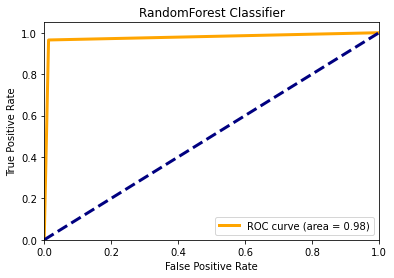

In [36]:
# check auc_roc curve and auc score of best model
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds = roc_curve(pred_rf,y_test)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr,tpr,color="orange", lw=3, label=("ROC curve (area = %0.2f)" % roc_auc))
plt.plot([0,1],[0,1],color = "navy",lw=3,linestyle="--")
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RandomForest Classifier")
plt.legend(loc = "lower right")
plt.show()

From the above plot we can see that, we get best area under the curve for randomforest classifier, which is 98%.

In [37]:
#save best result
df1 = pd.DataFrame(pred_rf)
df1.to_csv("rf_malignant.csv")
#save best model
import joblib
joblib.dump(rf,"rf_malignant.obj")

['rf_malignant.obj']

In [38]:
# check our test dataset with best model
test_dataset = rf.predict(feature_test)
print(test_dataset)

[0 1 0 ... 0 0 0]


In [39]:
#save test dataset result
df2 = pd.DataFrame(test_dataset)
df2.to_csv("rf_malignant_test.csv")